# Check if simulation cadence has any effect on field dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Linear driven run with $A_\parallel = 0$

In [2]:
ti_te = 1
kperp_rhoi = 0.2
wbar_0 = .2
bi = 0.01
bpar0 = 10
mi_me = 1836

load data for 3 linear runs: $tk_\parallel v_{ti}= 0.01, 0.005, 0.001$

In [3]:
data_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_slow_1'
filename_bpar = np.array([data_dir + '/lin_slow_{0:s}.bpar'.format(i) for i in ['1', '2', '3']])
filename_phi = np.array([data_dir + '/lin_slow_{0:s}.phi'.format(i) for i in ['1', '2', '3']])

template to read $\delta B_\parallel$ and $\phi$ from file

In [4]:
dtype_bpar = {'names': ('f1', 't', 'f2', 'bpar2', 'f3', 'f4', 'h1', 'h2'),
              'formats': ('S2', 'f4', 'S10', 'f4', 'S10', 'S10', 'f4', 'f4')}
dtype_phi = {'names': ('f1', 't', 'f2', 'phi2', 'f3', 'f4', 'h1', 'h2'),
              'formats': ('S2', 'f4', 'S10', 'f4', 'S10', 'S10', 'f4', 'f4')}
data_bpar = [np.loadtxt(filename_bpar[i], dtype = dtype_bpar) for i in range(3)]
data_phi = [np.loadtxt(filename_phi[i], dtype = dtype_bpar) for i in range(3)]

In [5]:
def readColumn(data, column):
    return np.array([elem[column] for elem in data])

In [6]:
bpar = [np.sqrt(readColumn(data, 3)) for data in data_bpar]
t_bpar = [readColumn(data, 1) for data in data_bpar]
phi = [np.sqrt(readColumn(data, 3)) for data in data_phi]
t_phi = [readColumn(data, 1) for data in data_phi]

Annotations

In [7]:
dt_label=['0.01', '0.005', '0.001']
texts = "{0}{1}\n".format(r'$\beta_i=$',bi) + \
    "{0}{1}\n".format(r'$T_i/T_e=$',ti_te) + \
    "{0}{1:.1f}\n".format(r'$k_\perp \rho_i=$',kperp_rhoi) + \
    "{0}{1:.1f}\n".format(r'$\delta B_{\mathbf{k}\parallel 0}=$', bpar0) +\
    "{0}{1:.1f}\n".format(r'$\overline{\omega}_0=$',wbar_0)

#### Overplot 3 linear runs

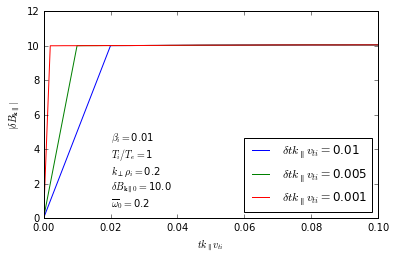

In [8]:
fig_bpar_cadence = plt.figure(figsize=[6, 6*0.618])
for i in range(3):
    plt.plot(t_bpar[i], bpar[i] * np.sqrt(8) * 10, label = '$\delta t k_\parallel v_{ti}=$' + dt_label[i] )
plt.xlim(0, 0.1)
plt.xlabel('$tk_\parallel v_{ti}$')
plt.ylabel('$|\delta B_{\mathbf{k}\parallel}|$')
plt.legend(loc='lower right')
plt.text(0.02, 0, texts)

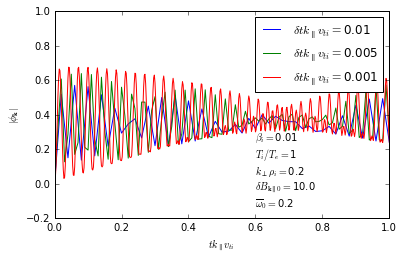

In [18]:
fig_phi_cadence = plt.figure(figsize=[6, 6*0.618])
for i in range(3):
    plt.plot(t_phi[i], phi[i], label = '$\delta t k_\parallel v_{ti}=$' + dt_label[i] )
plt.xlim([0, 1])
plt.ylim([-0.2, 1])
plt.xlabel('$tk_\parallel v_{ti}$')
plt.ylabel('$|\phi_{\mathbf{k}}|$')
plt.legend(loc='best')
plt.text(0.6, -0.2, texts)

save images

In [19]:
# fig_phi_cadence.savefig('agk_phi_cadence.eps')
# fig_bpar_cadence.savefig('agk_bpar_cadence.eps')

## Linear driven run with $\delta B_\parallel=0$

In [20]:
ti_te = 0.01
kperp_rhoi = 0.4
wbar_0 = 3.6
bi = 0.01
apar0 = 10
mi_me = 1836

In [21]:
data_dir = '/Volumes/yuguang_sd/data/agk/lin_response/lin_alf_1'
filename_apar = np.array([data_dir + '/lin_alf_{0:s}.apar'.format(i) for i in ['1', '2', '3']])

In [22]:
dtype_apar = {'names': ('f1', 't', 'f2', 'apar2', 'f3', 'f4', 'h1', 'h2'),
              'formats': ('S2', 'f4', 'S10', 'f4', 'S10', 'S10', 'f4', 'f4')}

data_apar = [np.loadtxt(filename_apar[i], dtype = dtype_apar) for i in range(3)]

In [23]:
def readColumn(data, column):
    return np.array([elem[column] for elem in data])
apar = [np.sqrt(readColumn(data, 3)) for data in data_apar]
t_apar = [readColumn(data, 1) for data in data_apar]

In [24]:
dt_label=['0.01', '0.005', '0.001']
texts = "{0}{1}\n".format(r'$\beta_i=$',bi) + \
    "{0}{1}\n".format(r'$T_i/T_e=$',ti_te) + \
    "{0}{1:.1f}\n".format(r'$k_\perp \rho_i=$',kperp_rhoi) + \
    "{0}{1:.1f}\n".format(r'$\delta A_{\mathbf{k}\parallel 0}=$', apar0) +\
    "{0}{1:.1f}\n".format(r'$\overline{\omega}_0=$',wbar_0)

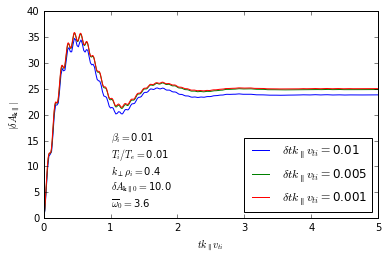

In [25]:
fig_apar_cadence = plt.figure(figsize=[6, 6*0.618])
for i in range(3):
    plt.plot(t_apar[i], apar[i] * np.sqrt(8), label = '$\delta t k_\parallel v_{ti}=$' + dt_label[i] )
plt.xlabel('$tk_\parallel v_{ti}$')
plt.ylabel('$|\delta A_{\mathbf{k}\parallel}|$')
plt.legend(loc='lower right')
plt.text(1., 0, texts)

save image

In [26]:
# fig_apar_cadence.savefig('agk_apar_cadence.eps')